### Omnilytics Data Science Challenge

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
trend = pd.read_csv('/content/trends1.csv', parse_dates=True, 
                 index_col="date")
predictions = pd.read_csv('/content/predictions.csv', parse_dates=True, 
                 index_col="date")

In [193]:
trend = trend.drop(columns='Unnamed: 0')
predictions = predictions.drop(columns='Unnamed: 0')


In [194]:
trend.head()

,top 1,top 2,top 3
date,,,
2012-10-07,4,14,14
2012-10-14,7,15,18
2012-10-21,5,12,15
2012-10-28,5,15,12
2012-11-04,4,12,12


In [195]:
predictions.head()

,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
date,,,,,,,,,
2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650


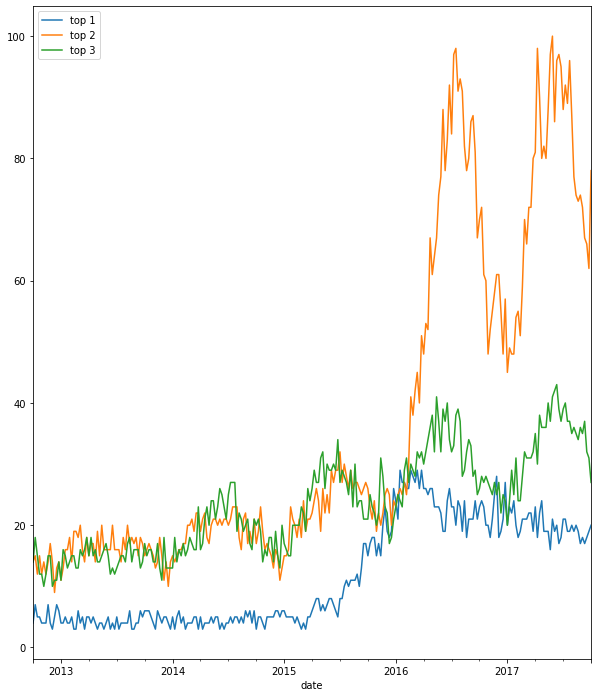

In [196]:
trend.plot(figsize=(10, 12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7383a3d290>,
      dtype=object)

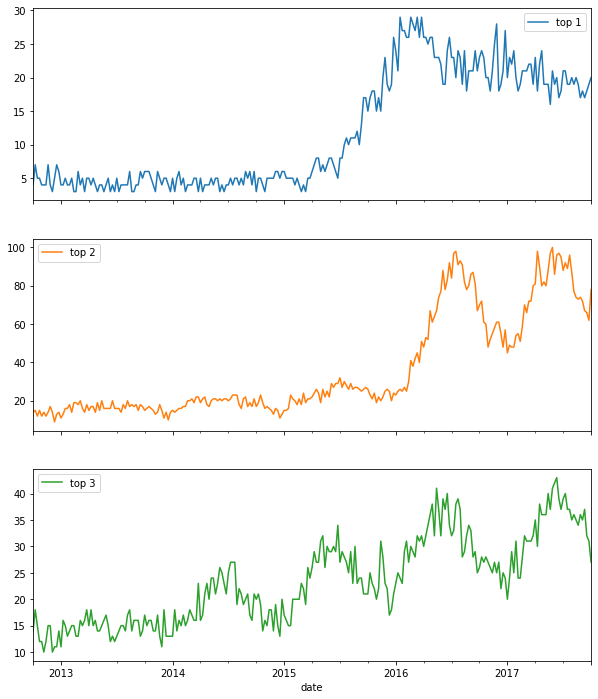

In [197]:
trend.plot(subplots=True, figsize=(10, 12))

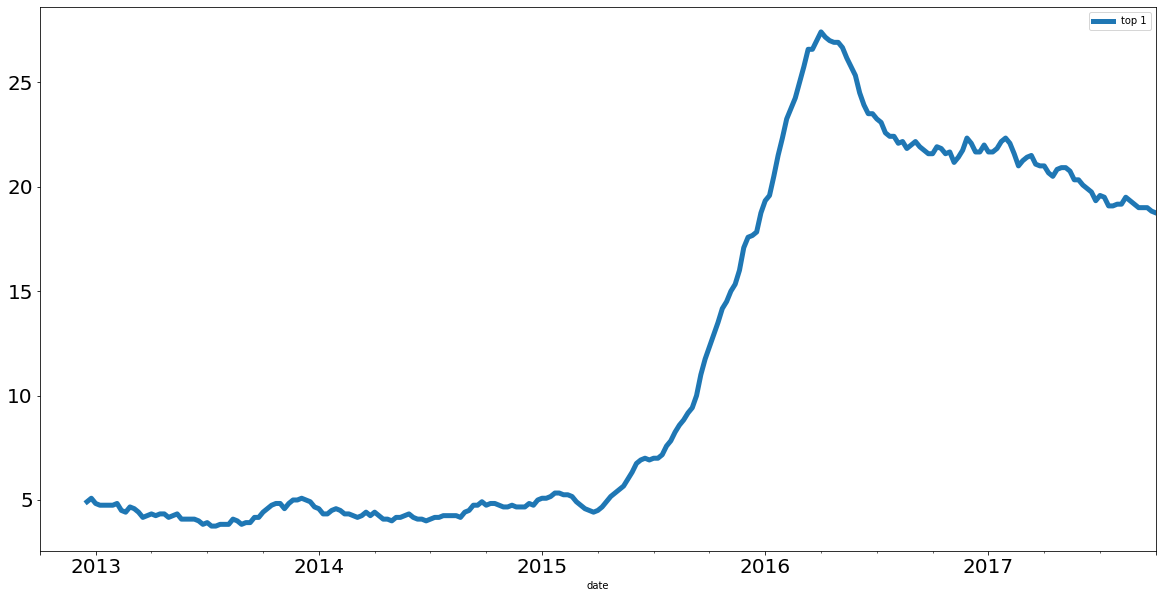

In [198]:
top1 = trend[['top 1']]
top1.rolling(12).mean().plot(figsize=(20,10),linewidth = 5,fontsize = 20)

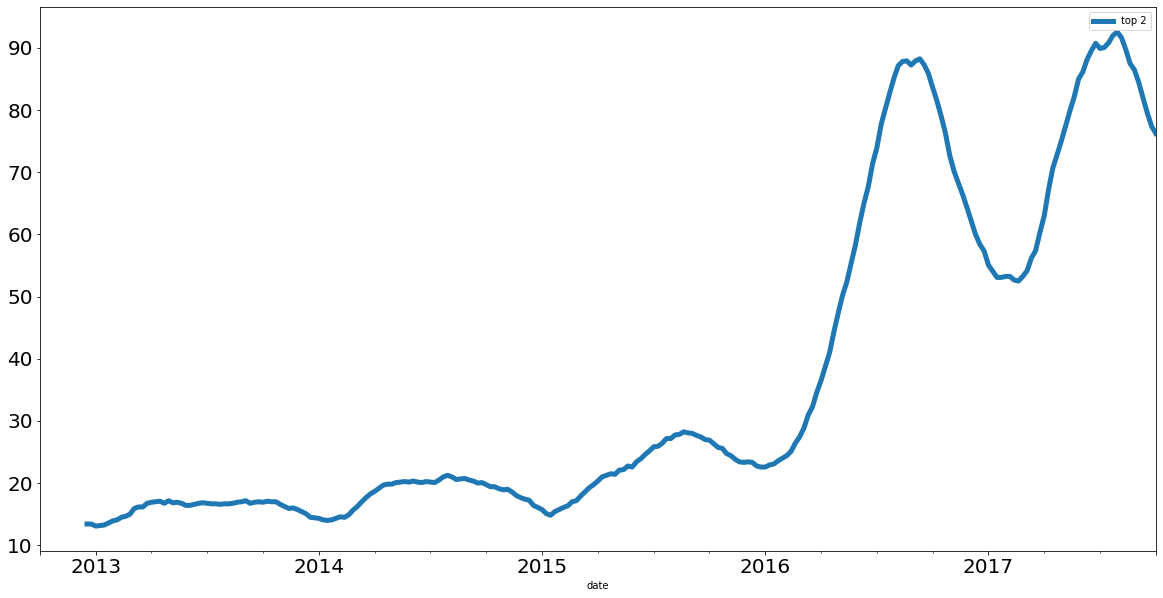

In [199]:
top2 = trend[['top 2']]
top2.rolling(12).mean().plot(figsize=(20,10),linewidth = 5,fontsize = 20)

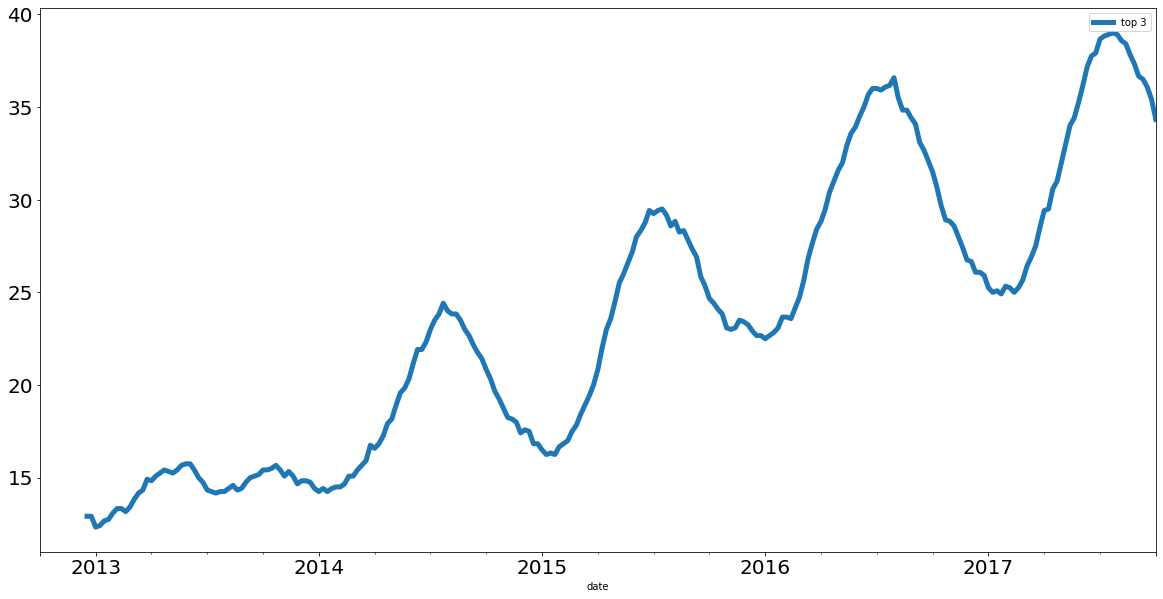

In [200]:
top3 = trend[['top 3']]
top3.rolling(12).mean().plot(figsize=(20,10),linewidth = 5,fontsize = 20)

 **1. Assess the three trends in trends1.csv, which is performing best. Elaborate on
how you defined "best performance".**

Top 2 have the best performance between the three top. It has the highest popularity score and growth.

 **2. Quantify the performance over the last year - to establish what proportion of
demand has changed.**

In [201]:
trend.index = pd.to_datetime(trend.index)

trend['Month_Year'] = trend.index.strftime('%Y-%m')

In [202]:
yoy_top2 = pd.DataFrame(trend.groupby('Month_Year').sum()['top 2'])
yoy_top2['Year over Year'] = np.roll(yoy_top2['top 2'],12)
yoy_top2 = yoy_top2.drop(yoy_top2.index[0:12])


#Calculating YoY Growth for each month:
yoy_top2['Growth'] = (yoy_top2['top 2']/yoy_top2['Year over Year'])-1
yoy_top2.head()

,top 2,Year over Year,Growth
Month_Year,,,
2013-10,64,56,0.142857
2013-11,60,52,0.153846
2013-12,64,67,-0.044776
2014-01,60,56,0.071429
2014-02,70,70,0.000000


In [203]:
##Plotting YoY Growth
results = yoy_top2.drop(columns = ["top 2", "Year over Year"])
results['Month_Year'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Month_Year
0,0.142857,2013-10
1,0.153846,2013-11
2,-0.044776,2013-12
3,0.071429,2014-01
4,0.000000,2014-02


## Year over Year % Growth

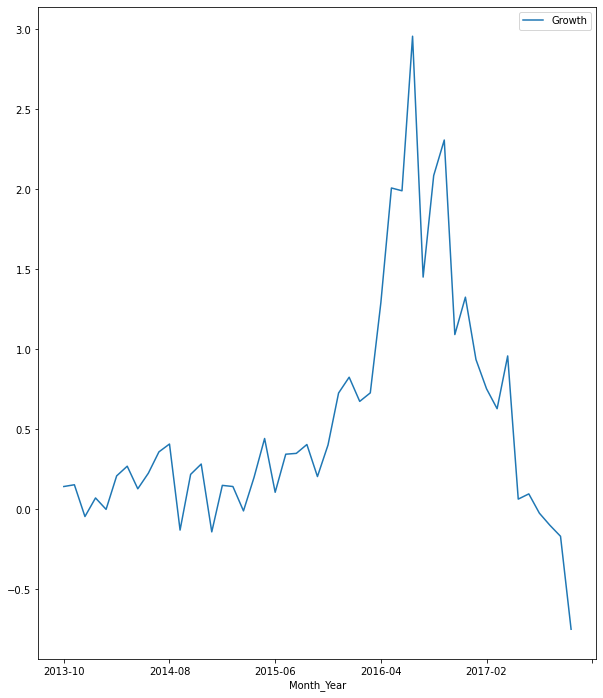

In [204]:
results = results.set_index('Month_Year')
results.plot(figsize=(10, 12))

**3. Look at the predictions.csv file - there are three fits for each trend, comment
on which you find to be best**

In [205]:
top1_fit = trend
top1_fit = trend.drop(columns=['top 3','top 2','Month_Year'])
top2_fit = trend
top2_fit = trend.drop(columns=['top 3','top 1','Month_Year'])
top3_fit = trend
top3_fit = trend.drop(columns=['top 1','top 2','Month_Year'])

In [206]:
top1_fit['fit top 1'] = predictions['fit top 1']
top1_fit['fit2 top 1'] = predictions['fit2 top 1']
top1_fit['fit3 top 1'] = predictions['fit3 top 1']

In [207]:
top1_fit.head()

,top 1,fit top 1,fit2 top 1,fit3 top 1
date,,,,
2012-10-07,4,6.464020,6.676299,6.814028
2012-10-14,7,6.405044,6.553469,6.678460
2012-10-21,5,5.594880,5.685904,5.801919
2012-10-28,5,4.556118,4.598339,4.706192
2012-11-04,4,4.203193,4.200978,4.297650


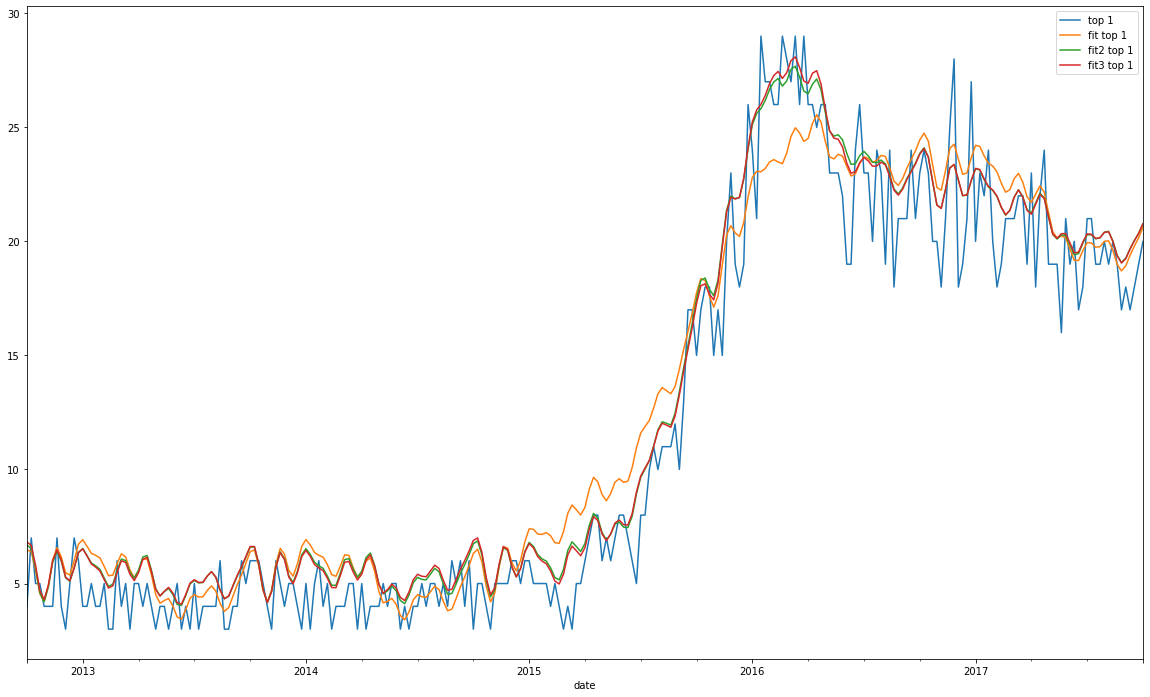

In [208]:
top1_fit.plot(figsize=(20, 12))

In [209]:
top2_fit['fit top 2'] = predictions['fit top 2']
top2_fit['fit2 top 2'] = predictions['fit2 top 2']
top2_fit['fit3 top 2'] = predictions['fit3 top 2']

In [210]:
top3_fit['fit top 3'] = predictions['fit top 3']
top3_fit['fit2 top 3'] = predictions['fit2 top 3']
top3_fit['fit3 top 3'] = predictions['fit3 top 3']

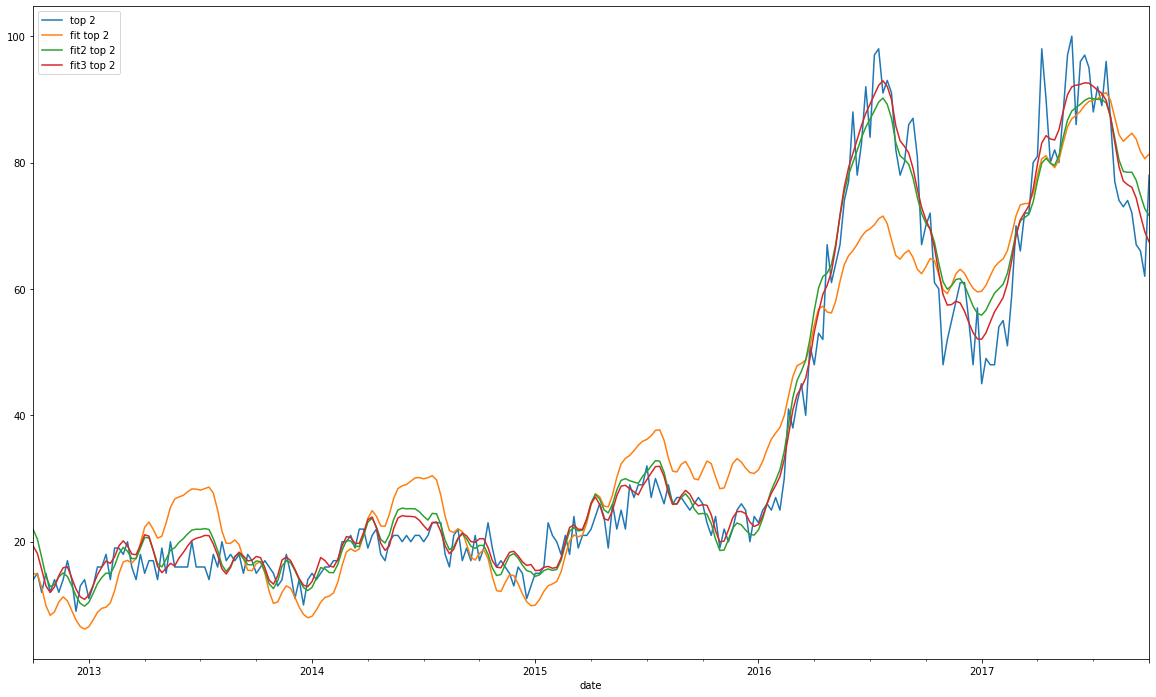

In [211]:
top2_fit.plot(figsize=(20, 12))

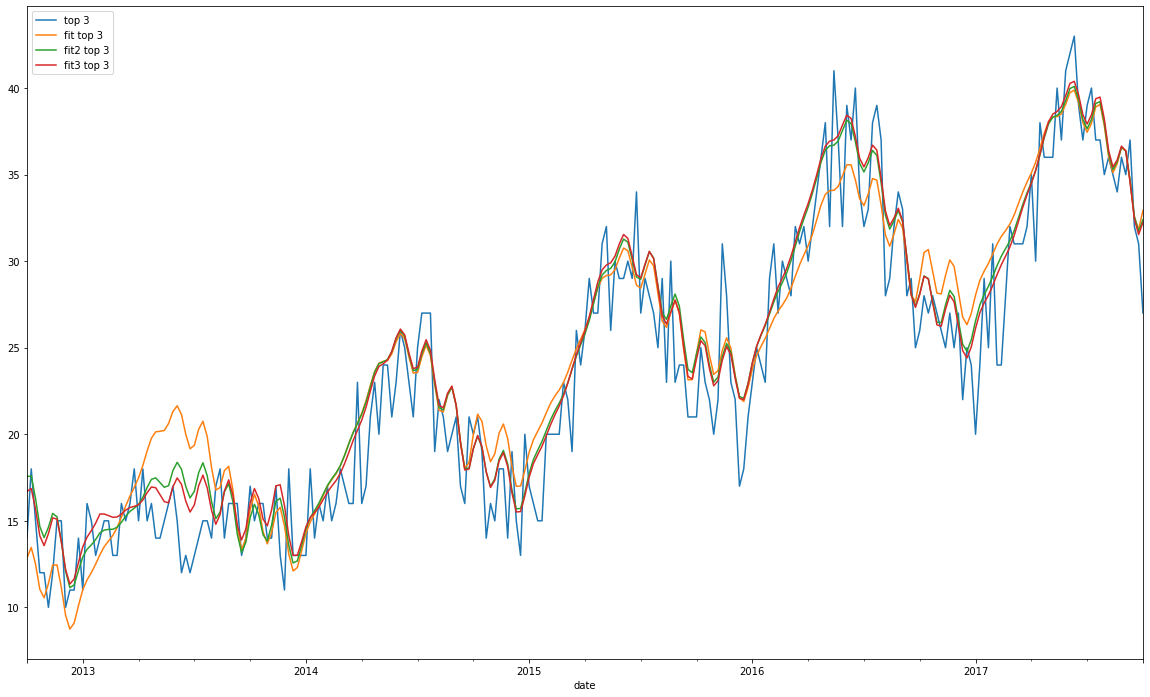

In [212]:
top3_fit.plot(figsize=(20, 12))

In [213]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse1 = mean_squared_error(top1_fit['top 1'], top1_fit['fit top 1'])
mse2 = mean_squared_error(top2_fit['top 2'], top2_fit['fit top 2'])
mse3 = mean_squared_error(top3_fit['top 3'], top3_fit['fit top 3'])
rmse1 = sqrt(mse1)
rmse2 = sqrt(mse2)
rmse3 = sqrt(mse3)

print('RMSE fit 1 top 1: %f' % rmse1)
print('RMSE fit 1 top 2: %f' % rmse2)
print('RMSE fit 1 top 3: %f' % rmse3)

RMSE fit 1 top 1: 2.149290
RMSE fit 1 top 2: 8.334584
RMSE fit 1 top 3: 2.979327


In [214]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse1 = mean_squared_error(top1_fit['top 1'], top1_fit['fit2 top 1'])
mse2 = mean_squared_error(top2_fit['top 2'], top2_fit['fit2 top 2'])
mse3 = mean_squared_error(top3_fit['top 3'], top3_fit['fit2 top 3'])
rmse1 = sqrt(mse1)
rmse2 = sqrt(mse2)
rmse3 = sqrt(mse3)

print('RMSE fit 2 top 1: %f' % rmse1)
print('RMSE fit 2 top 2: %f' % rmse2)
print('RMSE fit 2 top 3: %f' % rmse3)

RMSE fit 2 top 1: 1.778781
RMSE fit 2 top 2: 4.403149
RMSE fit 2 top 3: 2.463783


In [215]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse1 = mean_squared_error(top1_fit['top 1'], top1_fit['fit3 top 1'])
mse2 = mean_squared_error(top2_fit['top 2'], top2_fit['fit3 top 2'])
mse3 = mean_squared_error(top3_fit['top 3'], top3_fit['fit3 top 3'])
rmse1 = sqrt(mse1)
rmse2 = sqrt(mse2)
rmse3 = sqrt(mse3)

print('RMSE fit 3 top 1: %f' % rmse1)
print('RMSE fit 3 top 2: %f' % rmse2)
print('RMSE fit 3 top 3: %f' % rmse3)

RMSE fit 3 top 1: 1.757988
RMSE fit 3 top 2: 3.609914
RMSE fit 3 top 3: 2.368293


From the graph we can see that Fit 1 perform the worst for each trend while Fit 2 and Fit 3 closely follows the fit for each of the trends. Using RMSE as a measure for measuring the performance of each fits show that fit 3 is the best fit which have lower RMSE value in each of the top trends/

**5. Please create your own predictions based on the three types of tops.**

In [216]:
trend.head()

,top 1,top 2,top 3,Month_Year
date,,,,
2012-10-07,4,14,14,2012-10
2012-10-14,7,15,18,2012-10
2012-10-21,5,12,15,2012-10
2012-10-28,5,15,12,2012-10
2012-11-04,4,12,12,2012-11


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2017-10-02  19.784534   17.439129   22.186382
1 2017-10-03  19.851165   17.407875   22.356555
2 2017-10-04  19.913597   17.392857   22.482145
3 2017-10-05  19.970202   17.569851   22.338298
4 2017-10-06  20.019293   17.605659   22.418516


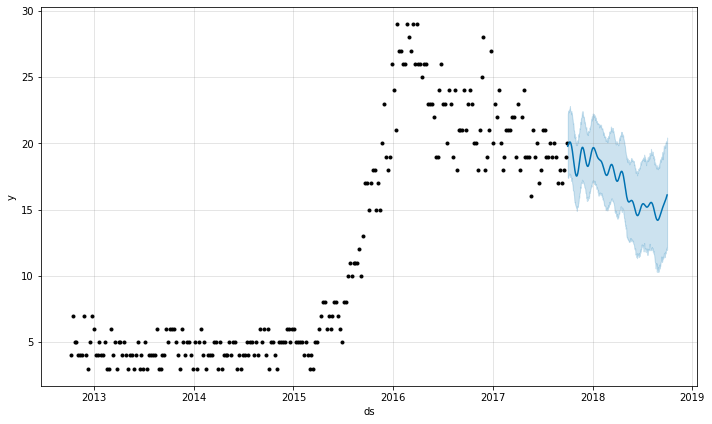

In [217]:
from fbprophet import Prophet
import matplotlib.pyplot as plt

trend = pd.read_csv('/content/trends1.csv', parse_dates=True)
predictions = pd.read_csv('/content/predictions.csv', parse_dates=True)

df = pd.DataFrame()
# prepare expected column names
df['ds']= trend['date']
df['y'] = trend['top 1']
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for x in predictions['date']:
  if pd.to_datetime(x) > pd.to_datetime("2017-10-01", format='%Y-%m-%d'):
    future.append(pd.to_datetime(x))

future = pd.DataFrame(future)
future.columns = ['ds']
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

In [218]:
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)

rmse

11.30574192618649

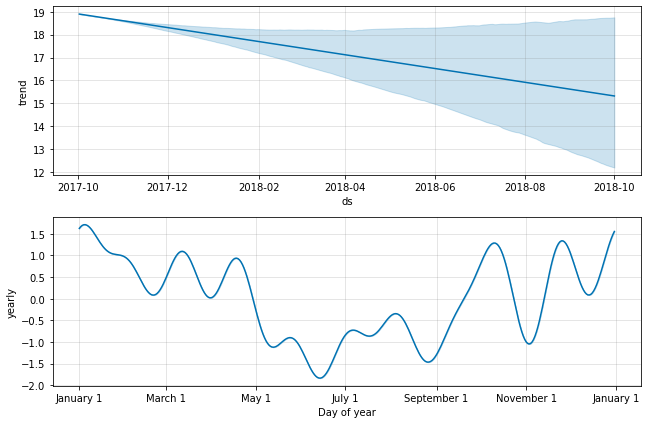

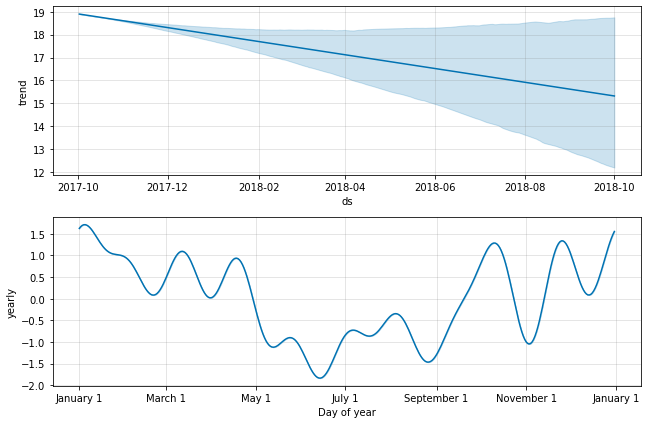

In [219]:
model.plot_components(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2017-10-02  83.189974   71.865091   95.082200
1 2017-10-03  83.463395   71.865487   94.277759
2 2017-10-04  83.739959   72.409231   94.807464
3 2017-10-05  84.012105   72.368964   95.097903
4 2017-10-06  84.272320   73.821804   96.328857


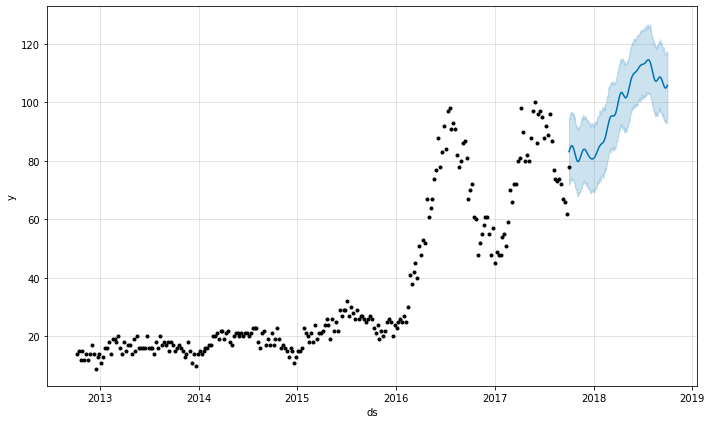

In [220]:
df = pd.DataFrame()
# prepare expected column names
df['ds']= trend['date']
df['y'] = trend['top 2']
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for x in predictions['date']:
  if pd.to_datetime(x) > pd.to_datetime("2017-10-01", format='%Y-%m-%d'):
    future.append(pd.to_datetime(x))

future = pd.DataFrame(future)
future.columns = ['ds']
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

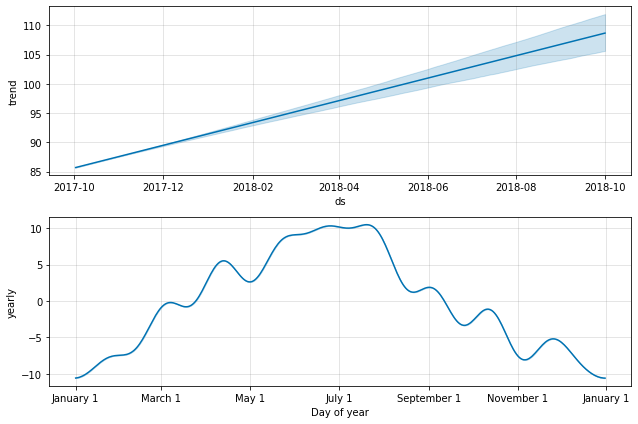

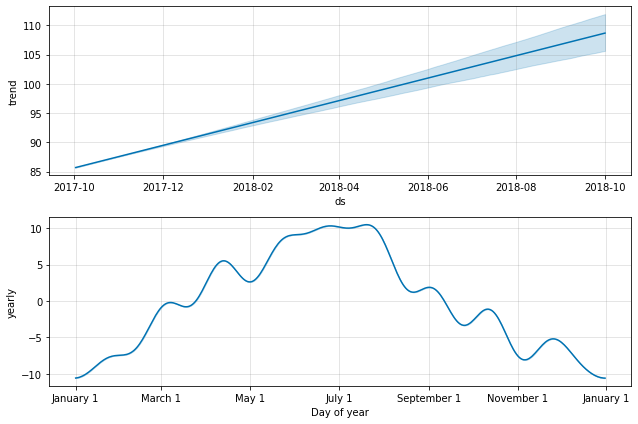

In [222]:
model.plot_components(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds       yhat  yhat_lower  yhat_upper
0 2017-10-02  32.182604   28.621289   35.619867
1 2017-10-03  32.431779   28.964148   36.159093
2 2017-10-04  32.680452   29.222860   36.256720
3 2017-10-05  32.922829   29.315785   36.588659
4 2017-10-06  33.153335   29.417789   36.668664


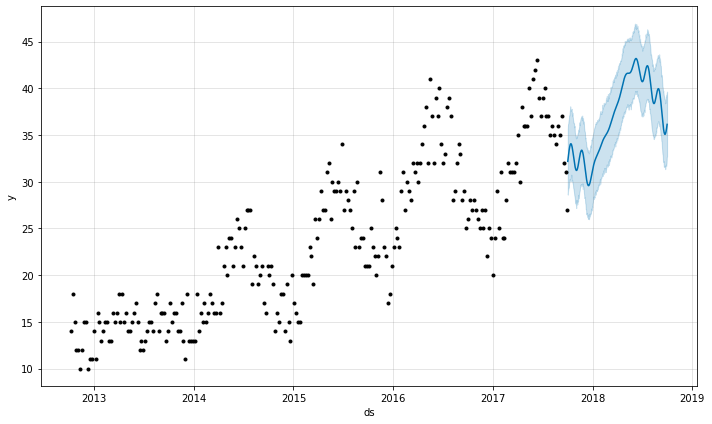

In [223]:
df = pd.DataFrame()
# prepare expected column names
df['ds']= trend['date']
df['y'] = trend['top 3']
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for x in predictions['date']:
  if pd.to_datetime(x) > pd.to_datetime("2017-10-01", format='%Y-%m-%d'):
    future.append(pd.to_datetime(x))

future = pd.DataFrame(future)
future.columns = ['ds']
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

In [224]:
se = np.square(forecast.loc[:, 'yhat'] - df['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)

rmse

13.554030201273461

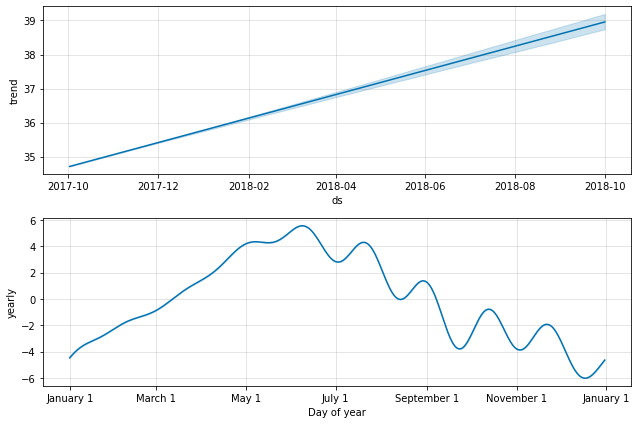

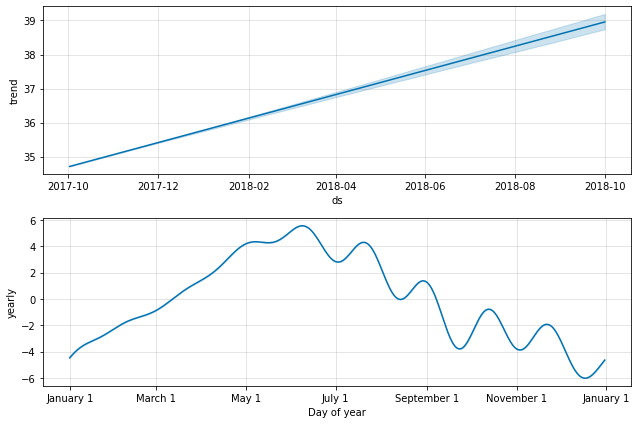

In [225]:
model.plot_components(forecast)

**6. Briefly explain your choice of model, and how it performs better or worse than
the provided predictions.**


In [243]:
df['ds']= trend['date']
df['y'] = trend['top 2']
train = df.drop(df.index[-53:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for x in trend['date']:
  if pd.to_datetime(x) > pd.to_datetime("2016-10-01", format='%Y-%m-%d'):
    future.append(pd.to_datetime(x))
future = pd.DataFrame(future)
future.columns = ['ds']

# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][208:].values
y_pred = forecast['yhat'].values
mse = mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % np.sqrt(mse))


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds   y
203  2016-08-28  80
204  2016-09-04  86
205  2016-09-11  87
206  2016-09-18  81
207  2016-09-25  67
RMSE: 59.294


Facebook prophet model is used to make prediction on the next 365 days, for evaluating the perfomance of the model, training data from before the date 2016-10-01 is used to fit the model on top 2 and the date after that is used to make prediction for the forecast. RMSE score shows that the model have poor performance compared to the provided fit.